## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pop=pd.read_csv('grades.csv')

In [5]:
pop.head() #grade between 0 and 10

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


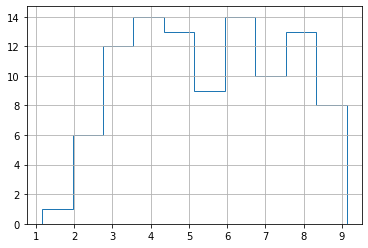

In [6]:
pop.grade.hist(histtype='step')

In [8]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


The histogram has no recognizable simple form, but the mean for the sample is 5.5. What can we say about the true mean value? This time we cannot build a confidence interval by simulating the sampling distribution because we do not know how to describe it. And, indeed, given the observed histogram it is unlikely that it has a simple form such as a no amount distribution.

However, we can still use computing by adopting a powerful idea in modern statistics, bootstrapping, which was introduced by Efron in 1979. What we'll do is to estimate the uncertainty of our statistic, the mean, by generating a large family of samples from the one we have. And then, characterizing the distribution of the mean over this family. Each sample in the family is prepared as follow: we draw grades randomly for our single existing sample allowing the same grade to be drawn more than once. Technically speaking, we are sampling with replacement.

In [9]:
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.850341
std,1.785399
min,2.130382
25%,4.413451
50%,5.959915
75%,7.302138
max,9.120705


We see that this bootstrapped sample, the mean is slightly different.

We can build a distribution of means:

In [11]:
bootstrap = pd.DataFrame({'meangrade' : [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

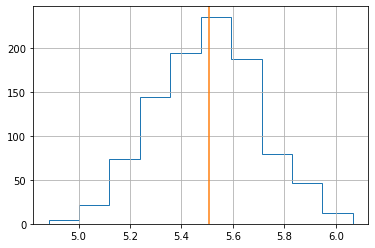

In [15]:
bootstrap.meangrade.hist(histtype='step')

#we can draw the original mean as a line on top of the histogram plot
pp.axvline(pop.grade.mean(),c='C1')

In [16]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.1209473638134275, 5.895277671447499)

We have a 95% confidence interval the mean is between 5.12 and 5.9

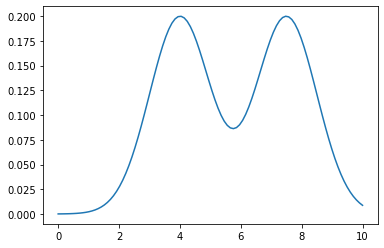

In [17]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [18]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [19]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

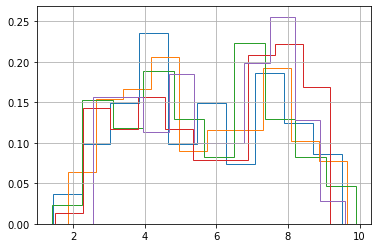

In [20]:
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [21]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

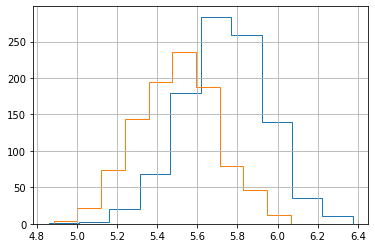

In [22]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')

Let's look at the histogram and compare with the bootstrapped distribution. We see that the 2 sampling distribution is displaced on the bootstrap estimate, but the spreads are comparable, which justifies our approximated confidence interval.